In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Basic image classification

In [7]:
# load the fashiohn mnist dataset direct from tensorflow
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
# preprocess the data by scaling the pixel values to 0 -> 1
train_images = train_images / 255.0
test_images = test_images / 255.0

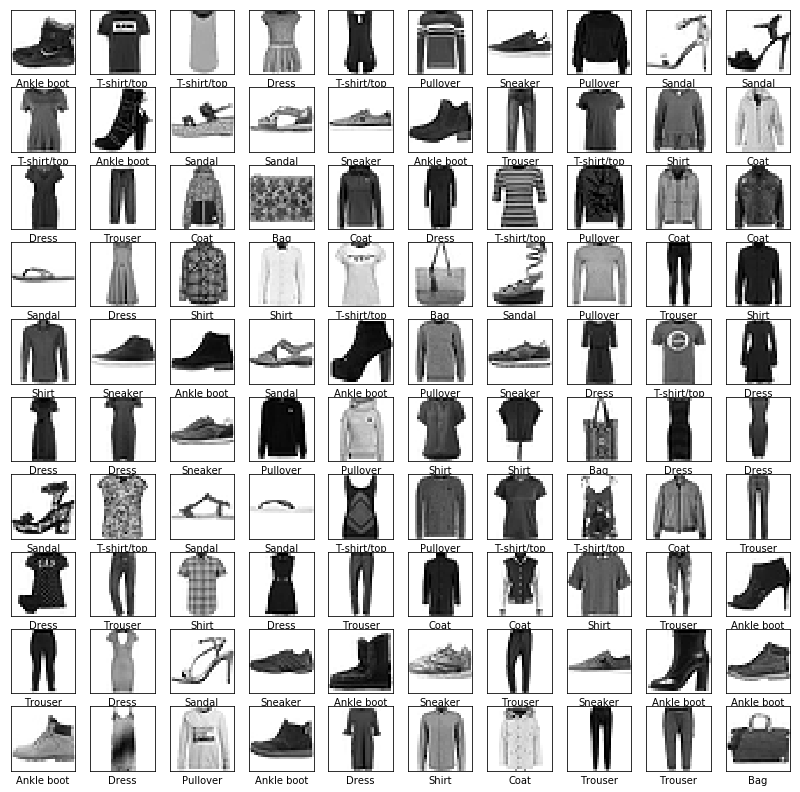

In [14]:
# examine the data by plotting the first 100 images with the corresponding training labels
plt.figure(figsize=(14,14))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [15]:
# build the model
model = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10)])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
# train the model
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.5008 - accuracy: 0.8234
Epoch 2/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3755 - accuracy: 0.8639
Epoch 3/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3382 - accuracy: 0.8760
Epoch 4/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3139 - accuracy: 0.8840
Epoch 5/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2964 - accuracy: 0.8900
Epoch 6/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2813 - accuracy: 0.8954
Epoch 7/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2696 - accuracy: 0.9000
Epoch 8/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2574 - accuracy: 0.9043
Epoch 9/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.2482 - accuracy: 0.9080
Epoch 10/10
6

In [17]:
# test the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

10000/1 - 0s - loss: 0.2704 - accuracy: 0.8760


In [20]:
# make predictions
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

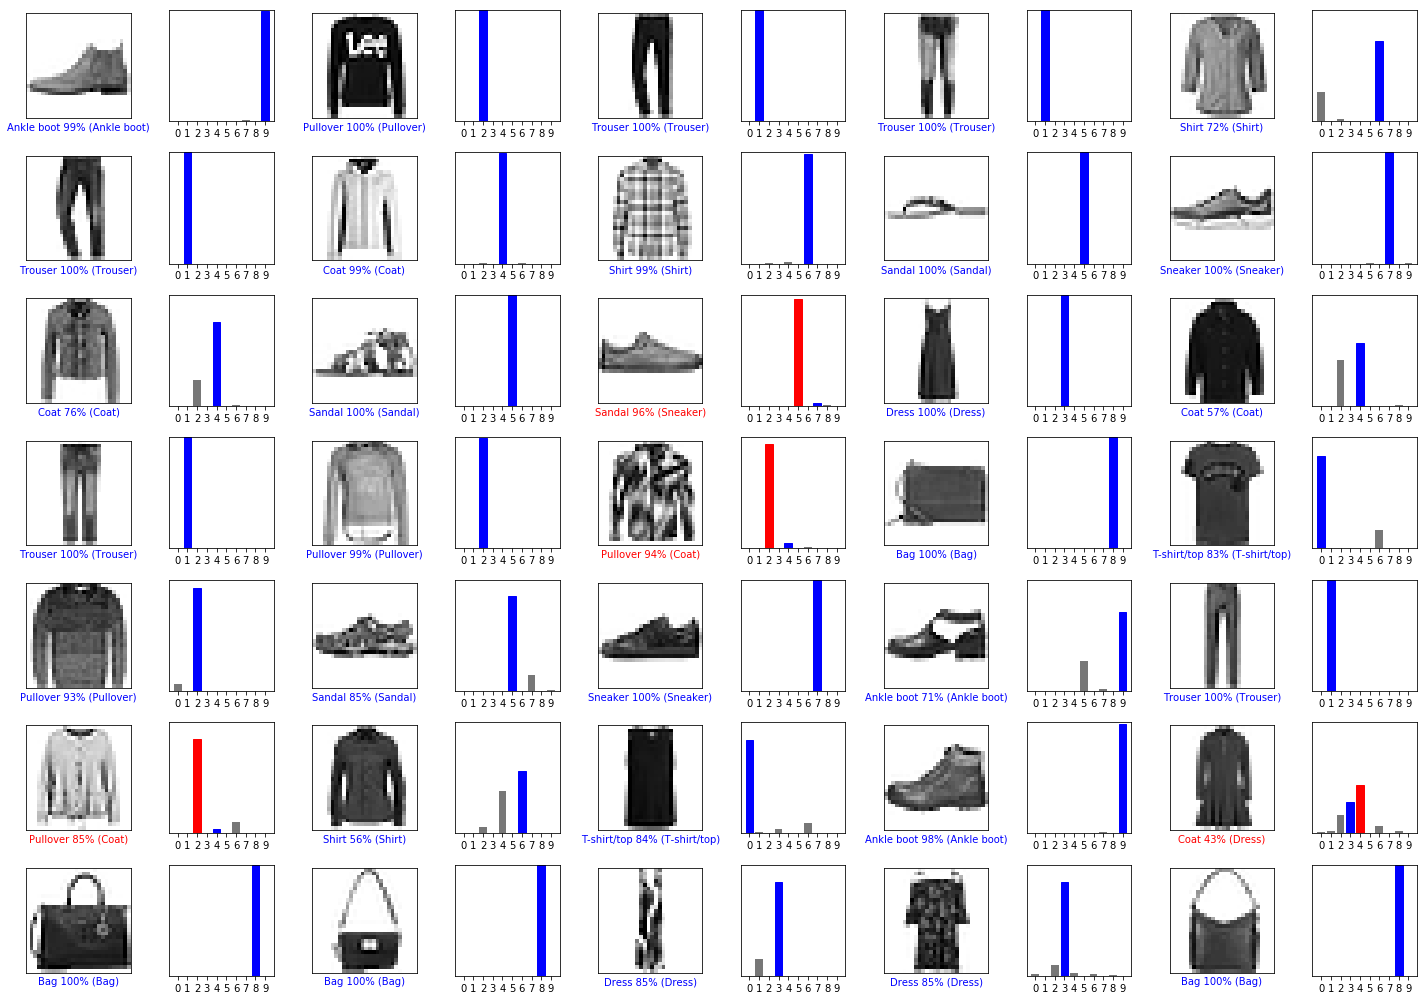

In [26]:
# plot predictions
def plot_image(i, predictions_array, true_label, img):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img[i], cmap=plt.cm.binary)
  if np.argmax(predictions_array) == true_label[i]:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[np.argmax(predictions_array)],100*np.max(predictions_array),
                                       class_names[true_label[i]]), color=color)

def plot_value_array(i, predictions_array, true_label):
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  thisplot[np.argmax(predictions_array)].set_color('red')
  thisplot[true_label[i]].set_color('blue')

num_rows = 7
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()